# Advanced Modeling and Feature Engineering

In [1]:
# libraries required are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import sample
import warnings # alert the user of some condition in program
warnings.filterwarnings('ignore') # There is warning if there are some absolete of
                                  # certain programming elements such as keywords or class, etc

In [2]:
#To see all the columns of dataset
pd.set_option('display.max_columns', 50)

### Import Dataset 

Import cleaned dataset

In [3]:
# Read dataset cleaned
dataset = pd.read_csv('Clean_Dataset.csv')
print(dataset)

        Unnamed: 0         a         e          i          om           w  \
0                0  2.769165  0.076009  10.594067   80.305532   73.597694   
1                1  2.772466  0.230337  26.577378  173.080063  310.048857   
2                2  2.669150  0.256942  12.988919  169.852760  248.138626   
3                3  2.361418  0.088721   7.141771  103.810804  150.728541   
4                4  2.574249  0.191095   5.366988  141.576605  358.687607   
...            ...       ...       ...        ...         ...         ...   
136401      797835  3.155975  0.343178  26.577378  115.532995  136.849398   
136402      797860  3.171225  0.159119  26.577378  309.036573   19.746812   
136403      798077  2.548410  0.076071  11.593237  246.298656  170.090810   
136404      799752  3.051336  0.287449  14.456779  343.917822  342.614839   
136405      810375  2.417477  0.109001   4.525668  148.244819   31.949854   

               q        ad     per_y  data_arc  condition_code  n_obs_used 

In [4]:
# dataset.head() prints/shows first 5 rows of dataset
dataset.head()

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma,Diameter
0,0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,10.24
1,1,2.772466,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,4.616444,14947.5,0,2145.0,11.85,N,N,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,10.24
2,2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14947.5,0,2145.0,11.85,N,N,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,10.24
3,3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14947.5,0,2145.0,11.85,N,N,0.3905,1.13948,MBA,0.271609,1325.432765,95.861936,10.24
4,4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14947.5,0,2145.0,11.85,N,N,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,10.24


In [5]:
# dropped Unnamed column's
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,10.24
1,2.772466,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,4.616444,14947.5,0,2145.0,11.85,N,N,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,10.24
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14947.5,0,2145.0,11.85,N,N,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,10.24
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14947.5,0,2145.0,11.85,N,N,0.3905,1.13948,MBA,0.271609,1325.432765,95.861936,10.24
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14947.5,0,2145.0,11.85,N,N,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,10.24


In [6]:
# Segregate/Separate the data into Numeric and Catergorical ones
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['neo', 'pha', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'Diameter']


## Converting Categorical Data into Numerical 

### Creating Dummy Variables 

You can go through converting categorical data into numerical using dummy variables here: https://www.geeksforgeeks.org/convert-a-categorical-variable-into-dummy-variables/

In [7]:
print("Categorical Data : ", categorical)

Categorical Data :  ['neo', 'pha', 'class']


One hot Encoder scikit-learn documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [8]:
# one-hot encoding columns using 'get_dummies'
# 'Dummies': a binary variable that indicates whether a separate categorical variable takes on a specific value.
# get_dummies is used for data manipulation.
# drop_first = True :--> reduces the extra column created during dummy variable creation(Hence it reduces the correlations
# created among dummy variables).
dummy_neo = pd.get_dummies(dataset['neo'], drop_first = True)
dummy_neo.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [9]:
dummy_pha = pd.get_dummies(dataset['pha'], drop_first = True)
dummy_pha.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [10]:
dummy_class = pd.get_dummies(dataset['class'], drop_first = True)
dummy_class.head()

,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [11]:
new_data = pd.concat([dataset, dummy_neo, dummy_pha, dummy_class], axis=1)
new_data.drop(['neo', 'pha', 'class'], axis=1, inplace=True)
new_data

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,albedo,moid,n,per,ma,Diameter,Y,Y,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,0.0900,1.594780,0.213885,1683.145708,77.372096,10.240,0,0,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,4.616444,14947.5,0,2145.0,11.85,0.1010,1.233240,0.213503,1686.155999,59.699133,10.240,0,0,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14947.5,0,2145.0,11.85,0.2140,1.034540,0.226019,1592.787285,34.925016,10.240,0,0,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14947.5,0,2145.0,11.85,0.3905,1.139480,0.271609,1325.432765,95.861936,10.240,0,0,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14947.5,0,2145.0,11.85,0.2740,1.095890,0.238632,1508.600458,282.366289,10.240,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136401,3.155975,0.343178,26.577378,115.532995,136.849398,1.797805,4.372047,5.606716,2250.0,2,47.0,18.20,0.1160,0.854315,0.175794,2047.852953,195.737632,1.077,0,0,0,0,0,0,0,1,0,0,0,0
136402,3.171225,0.159119,26.577378,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1,50.0,16.20,0.0210,1.663010,0.174527,2062.713583,164.999439,3.793,0,0,0,0,0,0,0,1,0,0,0,0
136403,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2,33.0,17.30,0.0610,1.367330,0.242270,1485.943371,145.319581,2.696,0,0,0,0,0,0,0,1,0,0,0,0
136404,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2,27.0,17.20,0.0720,1.166840,0.184914,1946.853973,175.708508,3.271,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
#new_data.drop(['Y','Y','APO','AST','ATE','CEN','IMB','MBA','MCA','OMB','TJN','TNO'])
#new_data

In [13]:
new_data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,albedo,moid,n,per,ma,Diameter,Y,Y,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,0.0900,1.59478,0.213885,1683.145708,77.372096,10.24,0,0,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,26.577378,173.080063,310.048857,2.133865,3.411067,4.616444,14947.5,0,2145.0,11.85,0.1010,1.23324,0.213503,1686.155999,59.699133,10.24,0,0,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14947.5,0,2145.0,11.85,0.2140,1.03454,0.226019,1592.787285,34.925016,10.24,0,0,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14947.5,0,2145.0,11.85,0.3905,1.13948,0.271609,1325.432765,95.861936,10.24,0,0,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14947.5,0,2145.0,11.85,0.2740,1.09589,0.238632,1508.600458,282.366289,10.24,0,0,0,0,0,0,0,1,0,0,0,0


## Split data into Train and Test Data 

from sklearn.model_selection import train_test_split

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
# importing and defining the model
# "sklearn.model_selection.train_test_split": Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Diameter', axis=1), new_data['Diameter'], test_size=0.2, random_state=1)

### Scaling the data 

In [15]:
# importing and defining model
# "sklearn.preprocessing import StandardScaler": Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# "scale.fit_transform" 
X_train = scale.fit_transform(X_train)

#"scale.transform"
X_test = scale.transform(X_test)

### Evaluation 

You can go through all these here:

"from sklearn.metrics import mean_absolute_error": https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

"from sklearn.metrics import mean_squared_error": https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

"from sklearn.metrics import r2_score": https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

"from math import sqrt": https://www.geeksforgeeks.org/python-math-function-sqrt/
 

In [16]:
# importing modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import seaborn as sns

In [17]:
def evaluate(y_pred, y_actual):
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_actual, y_pred)
    
    print("Mean Absolute Error :->", mae)
    print("Mean Squared Error :->", mse)
    print("Root Mean Squared Error :->", rmse)
    print("R2_Score :->", r2)
    
    return mae, mse, rmse, r2

In [18]:
# "Applying Algorithms"
# for storing algorithms name and it's performanace
algo_score = {}

## Applying Algorithms 

## Random Forest Regressor

sklearn.ensemble.RandomForestRegressor

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [19]:
# training the random forest regressor model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# predicting the test set results
y_pred_RF = RF_regressor.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_RF)

Mean Absolute Error :-> 0.26871852943333013
Mean Squared Error :-> 0.17632615109115907
Root Mean Squared Error :-> 0.41991207542908204
R2_Score :-> 0.969623951427643


In [21]:
algo_score['Random Forest Regressor'] = r2

## K Nearest Neighbor Regressor

sklearn.neighbors.KNeighborsRegressor

You can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [22]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 4)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [23]:
# predicting the test set results
y_pred_KNN = KNN.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_KNN)

Mean Absolute Error :-> 0.4779474103804707
Mean Squared Error :-> 0.4730649601683345
Root Mean Squared Error :-> 0.6877971795292087
R2_Score :-> 0.9116504039294485


In [24]:
algo_score['K Nearest Neighbor Regressor'] = r2

## Linear Regression 

from sklearn.linear_model import LinearRegression

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [25]:
# training the linear regressor model on the whole dataset
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# training
linear_regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# predicting the test set results
y_pred_LR = linear_regression.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_LR)

Mean Absolute Error :-> 0.5988856865940341
Mean Squared Error :-> 0.6338630346133242
Root Mean Squared Error :-> 0.7961551573740663
R2_Score :-> 0.8812456820746711


In [27]:
algo_score['Linear Regression'] = r2

## Decision Tree Regressor 

sklearn.tree.DecisionTreeRegressor

you can go through this here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [28]:
# training the decision tree regressor model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
# predicting the test set results
y_pred_DT = DT.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_DT)

Mean Absolute Error :-> 0.38444461549741255
Mean Squared Error :-> 0.35866529733890484
Root Mean Squared Error :-> 0.5988867149460779
R2_Score :-> 0.9400653150767918


In [30]:
algo_score['Decision Tree Regressor'] = r2

## XG Boost Regressor

You can go through this here: https://xgboost.readthedocs.io/en/stable/tutorials/index.html

In [31]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
# predicting the test set results
y_pred_XGB = XGB.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_XGB)

Mean Absolute Error :-> 0.275480797861573
Mean Squared Error :-> 0.17380856857402793
Root Mean Squared Error :-> 0.4169035482866846
R2_Score :-> 0.9703281842649443


In [33]:
algo_score['XG Boost Regressor'] = r2

## XG Boost with Hyperparameter Optimization 

In [34]:
# Defining Hyperparameters
hyper_parameter = {'learning_rate':[0.290, 0.30, 0.301],
                  'max_depth':[4, 6, 8],
                  'min_child_weight':[1, 3],
                  'gamma':[1, 0.1, 0.1],
                  'colsample_bytree':[0.9, 1, 1.1],
                  }

### Using RandomizedSearchCV for finding the best parameters 

In [35]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(XGB, param_distributions = hyper_parameter, n_jobs = -1, scoring = "neg_mean_squared_error", cv = 4, verbose = 3, random_state = 10)

In [36]:
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [37]:
print("Best Parameters found are : ")
random_search.best_params_

Best Parameters found are : 


{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.29,
 'gamma': 1,
 'colsample_bytree': 1}

In [38]:
# predicting the test set results
y_pred_XGB_Opt = random_search.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_XGB_Opt)

Mean Absolute Error :-> 0.26802133410794393
Mean Squared Error :-> 0.16979092180902614
Root Mean Squared Error :-> 0.41205694000832715
R2_Score :-> 0.9709879382816159


In [39]:
algo_score['XG Boost Optimizer'] = r2

## Artificial Neural Network 

In [40]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [41]:
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], units = 12, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dense(units = 10, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dense(units = 1, activation = "relu"))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                360       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [44]:
#X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)

In [45]:
History = model.fit(X_train, y_train, validation_split = 0.3, epochs = 200, batch_size = 100, shuffle=True)

Epoch 1/200
764/764 [==============================] - 6s 4ms/step - loss: 3.7408 - val_loss: 0.7774
Epoch 2/200
764/764 [==============================] - 2s 3ms/step - loss: 0.7879 - val_loss: 0.4941
Epoch 3/200
764/764 [==============================] - 2s 3ms/step - loss: 0.5050 - val_loss: 0.4227
Epoch 4/200
764/764 [==============================] - 2s 3ms/step - loss: 0.4236 - val_loss: 0.3844
Epoch 5/200
764/764 [==============================] - 2s 3ms/step - loss: 0.3744 - val_loss: 0.3498
Epoch 6/200
764/764 [==============================] - 3s 3ms/step - loss: 0.3389 - val_loss: 0.3170
Epoch 7/200
764/764 [==============================] - 2s 3ms/step - loss: 0.3076 - val_loss: 0.2870
Epoch 8/200
764/764 [==============================] - 2s 3ms/step - loss: 0.2825 - val_loss: 0.2657
Epoch 9/200
764/764 [==============================] - 2s 3ms/step - loss: 0.2644 - val_loss: 0.2507
Epoch 10/200
764/764 [==============================] - 2s 3ms/step - loss: 0.2522 - val_lo

764/764 [==============================] - 2s 3ms/step - loss: 0.1898 - val_loss: 0.1925
Epoch 82/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1902 - val_loss: 0.1930
Epoch 83/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1896 - val_loss: 0.1924
Epoch 84/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1902 - val_loss: 0.1907
Epoch 85/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1899 - val_loss: 0.1901
Epoch 86/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1897 - val_loss: 0.1914
Epoch 87/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1890 - val_loss: 0.1901
Epoch 88/200
764/764 [==============================] - 2s 2ms/step - loss: 0.1899 - val_loss: 0.1880
Epoch 89/200
764/764 [==============================] - 2s 2ms/step - loss: 0.1903 - val_loss: 0.1926
Epoch 90/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1898 - val_loss: 

Epoch 161/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1865 - val_loss: 0.1907
Epoch 162/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1872 - val_loss: 0.1903
Epoch 163/200
764/764 [==============================] - 2s 2ms/step - loss: 0.1868 - val_loss: 0.1885
Epoch 164/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1867 - val_loss: 0.1885
Epoch 165/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1867 - val_loss: 0.1896
Epoch 166/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1867 - val_loss: 0.1899
Epoch 167/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1865 - val_loss: 0.1895
Epoch 168/200
764/764 [==============================] - 2s 2ms/step - loss: 0.1867 - val_loss: 0.1970
Epoch 169/200
764/764 [==============================] - 2s 3ms/step - loss: 0.1871 - val_loss: 0.1874
Epoch 170/200
764/764 [==============================] - 2s 3ms/step - lo

In [46]:
# predicting the test set results
y_pred_model = model.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_model)

Mean Absolute Error :-> 0.2891273109701214
Mean Squared Error :-> 0.18918135229726651
Root Mean Squared Error :-> 0.4349498273332989
R2_Score :-> 0.9670964102180357


In [47]:
algo_score['Artificial Neural Network'] = r2

## Accuracy of Algorithms 

Designed 'Algorithm' VS 'R_squared' barplot for visualization and comparing the performance of algorithms.

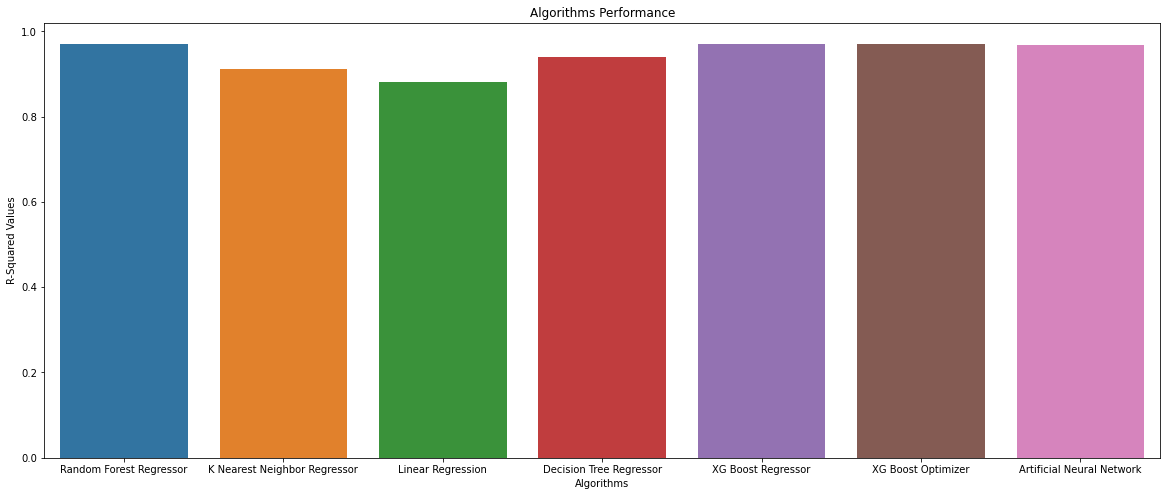

In [48]:
# Bar plot of different regressor algorithms
# plotted between Algorithms Vs R-Squared Values
plt.figure(figsize = (20, 8))
sns.barplot(x = list(algo_score.keys()), y = list(algo_score.values()))
plt.title("Algorithms Performance")
plt.xlabel("Algorithms")
plt.ylabel("R-Squared Values")
plt.show()

In [49]:
# Printing all the regressor algorithms and their R-squared values from the output/results obtained
for key, val in algo_score.items():
    print(key, '--->', val)

Random Forest Regressor ---> 0.969623951427643
K Nearest Neighbor Regressor ---> 0.9116504039294485
Linear Regression ---> 0.8812456820746711
Decision Tree Regressor ---> 0.9400653150767918
XG Boost Regressor ---> 0.9703281842649443
XG Boost Optimizer ---> 0.9709879382816159
Artificial Neural Network ---> 0.9670964102180357


In [53]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "R-Squared values"])
  
# Add rows
myTable.add_row(["Random Forest Regressor","0.969623951427643"])
myTable.add_row(["K Nearest Neighbor Regressor", "0.9116504039294485"])
myTable.add_row(["Linear Regression", " 0.8812456820746711"])
myTable.add_row(["Decision Tree Regressor", "0.9400653150767918"])
myTable.add_row(["XG Boost Regressor", "0.9703281842649443"])
myTable.add_row(["XG Boost Optimizer", "0.9709879382816159"])
myTable.add_row(["Artificial Neural Network", "0.9670964102180357"])
  
print(myTable)

+------------------------------+---------------------+
|          Algorithm           |   R-Squared values  |
+------------------------------+---------------------+
|   Random Forest Regressor    |  0.969623951427643  |
| K Nearest Neighbor Regressor |  0.9116504039294485 |
|      Linear Regression       |  0.8812456820746711 |
|   Decision Tree Regressor    |  0.9400653150767918 |
|      XG Boost Regressor      |  0.9703281842649443 |
|      XG Boost Optimizer      |  0.9709879382816159 |
|  Artificial Neural Network   |  0.9670964102180357 |
+------------------------------+---------------------+


In [54]:
# finding the best performing regressor algorithm and its R-squared value
maxi = 0
best_algo = ""
for key, val in algo_score.items():
    if val > maxi:
        maxi = val
        best_algo = key
print("Best Performing Algorithm is :---> ", best_algo)
print("R-Squared :---> ", maxi)

Best Performing Algorithm is :--->  XG Boost Optimizer
R-Squared :--->  0.9709879382816159
